# 02 - Modeling and Evaluation
### Email Marketing and Campaign Analytics

This notebook trains baseline and advanced models to predict:
- Email open probability
- Downstream engagement

We will evaluate:
- Precision, Recall, F1
- ROC-AUC
- Lift (marketing effectiveness)

And preparte the model for streamlit

In [3]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT / "src"))

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from preprocess import preprocess_raw_data
from features import prepare_data
from modeling import train_and_evaluate

In [4]:
df_clean = preprocess_raw_data(save_interim=False)
df_clean.head()

[2025-12-07 15:27:10] [preprocess] [INFO] >>> Starting preprocessing pipeline
[2025-12-07 15:27:12] [preprocess] [INFO] Loaded dataset. Shape: (400000, 30)
C:\Users\aakas\email-marketing-campaign-analytics\src\preprocess.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["mailing_date"] = pd.to_datetime(
[2025-12-07 15:27:12] [preprocess] [INFO] Dropped 2117 rows due to invalid mailing_date format or missing first names.
C:\Users\aakas\email-marketing-campaign-analytics\src\preprocess.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,id,first_name,last_name,email,country,region,gender,age,household_status,presence_children,...,open_flag,click_flag,conversion_flag,unsubscribe_flag,mailing_year,mailing_month,mailing_day,mailing_day_of_week,engagement_score,is_weekend
0,1,Aryan,Popov,aryan.popov2127@example.com,Brazil,South America,M,65,H,N,...,0,0,0,0,2024,4,15,0,0.846357,0
1,2,Anna,Adams,anna.adams3997@example.com,Japan,Asia,M,55,P,Y,...,0,0,0,0,2024,7,24,2,0.346411,0
2,3,Brynhild,Evans,brynhild.evans4223@example.com,India,Asia,M,29,H,Y,...,1,0,0,0,2024,4,23,1,0.566931,0
3,4,Chester,Jolie,chester.jolie8903@example.com,Germany,Europe,F,59,U,N,...,1,0,0,0,2024,12,27,4,0.744582,0
4,5,Russel,Spears,russel.spears622@example.com,Singapore,Asia,M,20,P,N,...,0,0,0,0,2024,3,6,2,0.633633,0


In [5]:
X_train, X_test, y_train, y_test, preprocessor, feature_names = prepare_data(df_clean, target_col= "open_flag")
X_train.shape, X_test.shape

[2025-12-07 15:28:10] [features] [INFO] Preparing model data with target: {target_col}
[2025-12-07 15:28:11] [features] [INFO] Train shape: (318306, 35), Test shape : (79577, 35)
[2025-12-07 15:28:11] [features] [INFO] Numeric features: ['age', 'num_adults', 'num_children', 'previous_open_rate', 'previous_click_rate', 'previous_purchases', 'engagement_score', 'mailing_hour', 'mailing_year', 'mailing_month', 'mailing_day', 'mailing_day_of_week', 'is_weekend']
[2025-12-07 15:28:11] [features] [INFO] One-hot features: ['gender', 'presence_children', 'owns_home', 'probable_renter', 'device_type', 'mailing_category', 'consumer_archetypes', 'mosaic_segment', 'income_range', 'household_status', 'marital_status']
[2025-12-07 15:28:11] [features] [INFO] Ordinal features: ['country', 'region', 'language']
[2025-12-07 15:28:13] [features] [INFO] Total transformed feature dimension: 54


((318306, 54), (79577, 54))

In [6]:
logreg_model, logreg_metrics = train_and_evaluate(
    "logreg", X_train, y_train, X_test, y_test)
logreg_metrics

[2025-12-07 15:29:15] [modeling] [INFO] Running training pipeline for model: logreg
[2025-12-07 15:29:15] [modeling] [INFO] ---Training Logistic Regression Model
d:\ProgramData\miniforge3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[2025-12-07 15:29:55] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7194005390362243), 'Precision': 0.5017329255861366, 'Recall': 0.12256586483390607, 'F1': 0.19700608389369195, 'ConfusionMatrix': [[57054, 2444], [17618, 2461]]}
[2025-12-07 15:29:55] [modeling] [INFO] Training and evaluation pipel

{'ROC_AUC': np.float64(0.7194005390362243),
 'Precision': 0.5017329255861366,
 'Recall': 0.12256586483390607,
 'F1': 0.19700608389369195,
 'ConfusionMatrix': [[57054, 2444], [17618, 2461]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        7958       3873       0.486680                  3873  1.928808
 8        7958       3378       0.424479                  7251  1.682291
 7        7957       2957       0.371622                 10208  1.472812
 6        7958       2572       0.323197                 12780  1.280892
 5        7957       2167       0.272339                 14947  1.079332
 4        7958       1789       0.224805                 16736  0.890947
 3        7958       1425       0.179065                 18161  0.709670
 2        7957       1044       0.131205                 19205  0.519992
 1        7958        581       0.073008                 19786  0.289346

In [7]:
rf_model, rf_metrics = train_and_evaluate("rf", X_train, y_train, X_test, y_test)
rf_metrics

[2025-12-07 15:30:52] [modeling] [INFO] Running training pipeline for model: rf
[2025-12-07 15:30:52] [modeling] [INFO] ---Training Random Forest Model
[2025-12-07 15:31:36] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7224847554201308), 'Precision': 0.524605982631071, 'Recall': 0.08122914487773296, 'F1': 0.1406762118337071, 'ConfusionMatrix': [[58020, 1478], [18448, 1631]]}
[2025-12-07 15:31:37] [modeling] [INFO] Training and evaluation pipeline complete.


{'ROC_AUC': np.float64(0.7224847554201308),
 'Precision': 0.524605982631071,
 'Recall': 0.08122914487773296,
 'F1': 0.1406762118337071,
 'ConfusionMatrix': [[58020, 1478], [18448, 1631]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        7722       3775       0.488863                  3775  1.937460
 8        7899       3394       0.429675                  7169  1.702885
 7        7933       2964       0.373629                 10133  1.480765
 6        8081       2619       0.324094                 12752  1.284446
 5        7937       2198       0.276931                 14950  1.097531
 4        7664       1766       0.230428                 16716  0.913231
 3        8369       1491       0.178157                 18207  0.706073
 2        7691       1008       0.131062                 19215  0.519425
 1        8150        631       0.077423                 19846  0.306844
 

In [9]:
xgb_model, xgb_metrics = train_and_evaluate("xgb", X_train, y_train, X_test, y_test)
xgb_metrics

[2025-12-07 15:32:24] [modeling] [INFO] Running training pipeline for model: xgb
[2025-12-07 15:32:24] [modeling] [INFO] ---Training XGBoost model
[2025-12-07 15:32:30] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7296876780396214), 'Precision': 0.5296239052035033, 'Recall': 0.10239553762637582, 'F1': 0.17161220316347398, 'ConfusionMatrix': [[57672, 1826], [18023, 2056]]}
[2025-12-07 15:32:30] [modeling] [INFO] Training and evaluation pipeline complete.


{'ROC_AUC': np.float64(0.7296876780396214),
 'Precision': 0.5296239052035033,
 'Recall': 0.10239553762637582,
 'F1': 0.17161220316347398,
 'ConfusionMatrix': [[57672, 1826], [18023, 2056]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        7958       4008       0.503644                  4008  1.996040
 8        7958       3405       0.427871                  7413  1.695738
 7        7957       2920       0.366972                 10333  1.454384
 6        7958       2587       0.325082                 12920  1.288362
 5        7957       2230       0.280256                 15150  1.110711
 4        7958       1812       0.227695                 16962  0.902401
 3        7958       1397       0.175547                 18359  0.695726
 2        7957        985       0.123790                 19344  0.490605
 1        7958        594       0.074642                 19938  0.295820

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, X_test, y_test, title="ROC Curve"):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

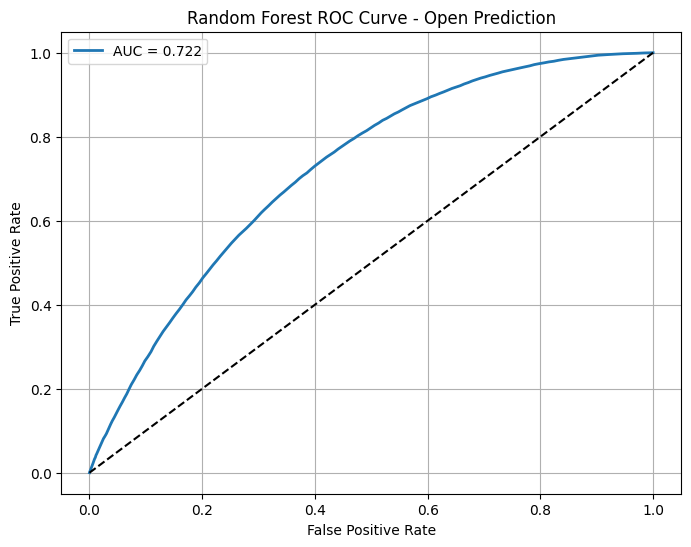

In [11]:
plot_roc(rf_model, X_test, y_test, title="Random Forest ROC Curve - Open Prediction")

In [12]:
def plot_lift(lift_table, title="Lift Chart"):
    df_plot = lift_table.copy()
    df_plot = df_plot.sort_index(ascending=False).reset_index()

    plt.figure(figsize=(10,6))
    plt.plot(df_plot.index, df_plot["lift"], marker='o')
    plt.title(title)
    plt.xlabel("Decile (0 = lowest, 9=highest)")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.show()

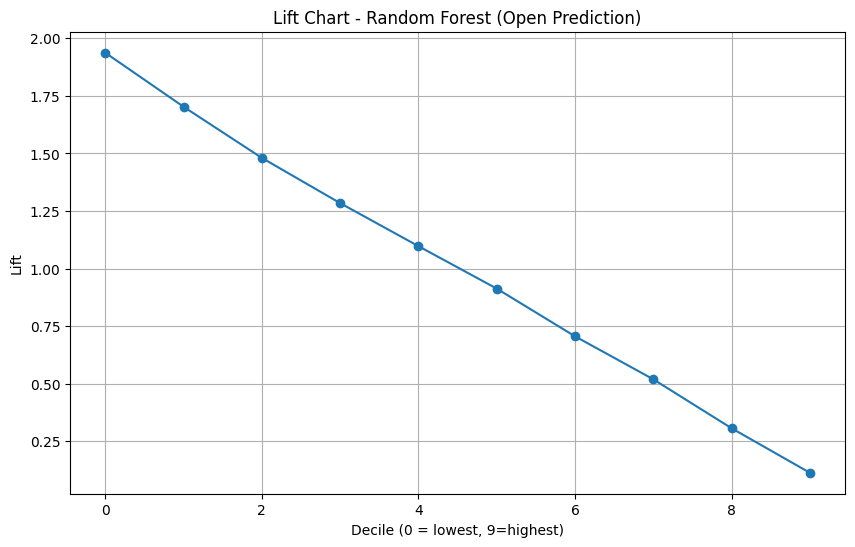

,total,positives,response_rate,cumulative_positives,lift
decile,,,,,
9,7722,3775,0.488863,3775,1.937460
8,7899,3394,0.429675,7169,1.702885
7,7933,2964,0.373629,10133,1.480765
6,8081,2619,0.324094,12752,1.284446
5,7937,2198,0.276931,14950,1.097531
4,7664,1766,0.230428,16716,0.913231
3,8369,1491,0.178157,18207,0.706073
2,7691,1008,0.131062,19215,0.519425
1,8150,631,0.077423,19846,0.306844


In [14]:
rf_lift = rf_metrics["lift"]
plot_lift(rf_lift, title="Lift Chart - Random Forest (Open Prediction)")
rf_lift

C:\Users\aakas\AppData\Local\Temp\ipykernel_19192\1046028669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="importance", y="feature", palette="viridis")


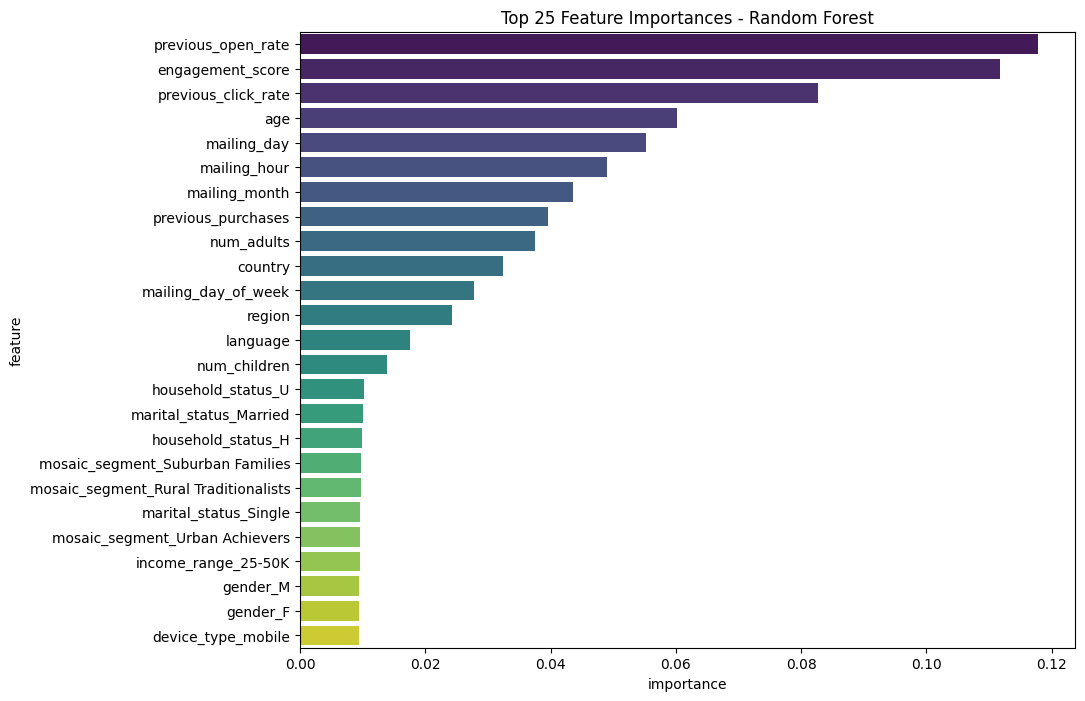

,feature,importance
3,previous_open_rate,0.117827
6,engagement_score,0.111758
4,previous_click_rate,0.082626
0,age,0.060161
10,mailing_day,0.055179
7,mailing_hour,0.048941
9,mailing_month,0.043544
5,previous_purchases,0.039600
1,num_adults,0.037540
51,country,0.032423


In [15]:
importances = rf_model.feature_importances_
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(25)

plt.figure(figsize=(10,8))
sns.barplot(data=fi_df, x="importance", y="feature", palette="viridis")
plt.title("Top 25 Feature Importances - Random Forest")
plt.show()

fi_df

In [16]:
import joblib

MODEL_DIR = PROJECT_ROOT / "models"
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(rf_model, MODEL_DIR / "rf_open_model.pkl")
joblib.dump(preprocessor, MODEL_DIR / "rf_preprocessor.pkl")

"Model and preprocessor saved successfully"

'Model and preprocessor saved successfully'

# Modeling summary

### Logistic regression
- Baseline performance
- Good for interpretability
- Useful as a sanity check

### Random Forest (Our primary model)
- Higher ROC-AUC
- Stronger lift in top deciles
- Excellent for marketing targeting

### Decile Lift Observations
- Top decile achieved ~1.94x lift
- Significant business value
- Ideal for top-tier targeting campaigns